# Analyze emission in US (don’t have 2018 data)

How have greenhouse gas emissions in the United States changed over time (using data collected from the following years: 2014, 2016 and annual year from 1990-2017) Since don't have 2018 data, try to predict based on previous year

In [1]:
#import libraries that are needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning - Awareness by States - 2014

In [2]:
#import awareness by state 2014
awareness_2014 = pd.read_csv('Datasets/YPCCC_2014_State.csv')
print(awareness_2014)

   Statecode             Statename  TotalPop  taxdividend_PredPop  \
0         AK                Alaska    447543               185343   
1         AL               Alabama   3166424              1291286   
2         AR              Arkansas   1921039               815522   
3         AZ               Arizona   4149955              1747013   
4         CA            California  24117317             11341411   
5         CO              Colorado   3328869              1458277   
6         CT           Connecticut   2431340              1094904   
7         DC  District of Columbia    417432               224318   
8         DE              Delaware    603331               267427   
9         FL               Florida  13127624              5615583   
10        GA               Georgia   6242508              2670701   
11        HI                Hawaii    928132               473519   
12        IA                  Iowa   2013629               904017   
13        ID                 Idaho

In [3]:
#store Statename and happening data only
state_2014 = awareness_2014[['Statename', 'happening']]

In [4]:
#sort the dataset in descending order
sort_state_2014 = state_2014.sort_values(by = ['happening'], ascending = False)
print(sort_state_2014)

               Statename  happening
7   District of Columbia         81
11                Hawaii         75
34              New York         72
4             California         70
19         Massachusetts         69
31            New Jersey         68
46               Vermont         68
47            Washington         68
20              Maryland         68
37                Oregon         67
14              Illinois         67
39          Rhode Island         66
32            New Mexico         66
6            Connecticut         66
5               Colorado         66
8               Delaware         65
21                 Maine         64
33                Nevada         64
45              Virginia         64
9                Florida         64
3                Arizona         64
10               Georgia         63
23             Minnesota         63
43                 Texas         63
27        North Carolina         62
0                 Alaska         62
38          Pennsylvania    

Text(0.5, 1.0, 'Awareness of Climate Change in US - 2014')

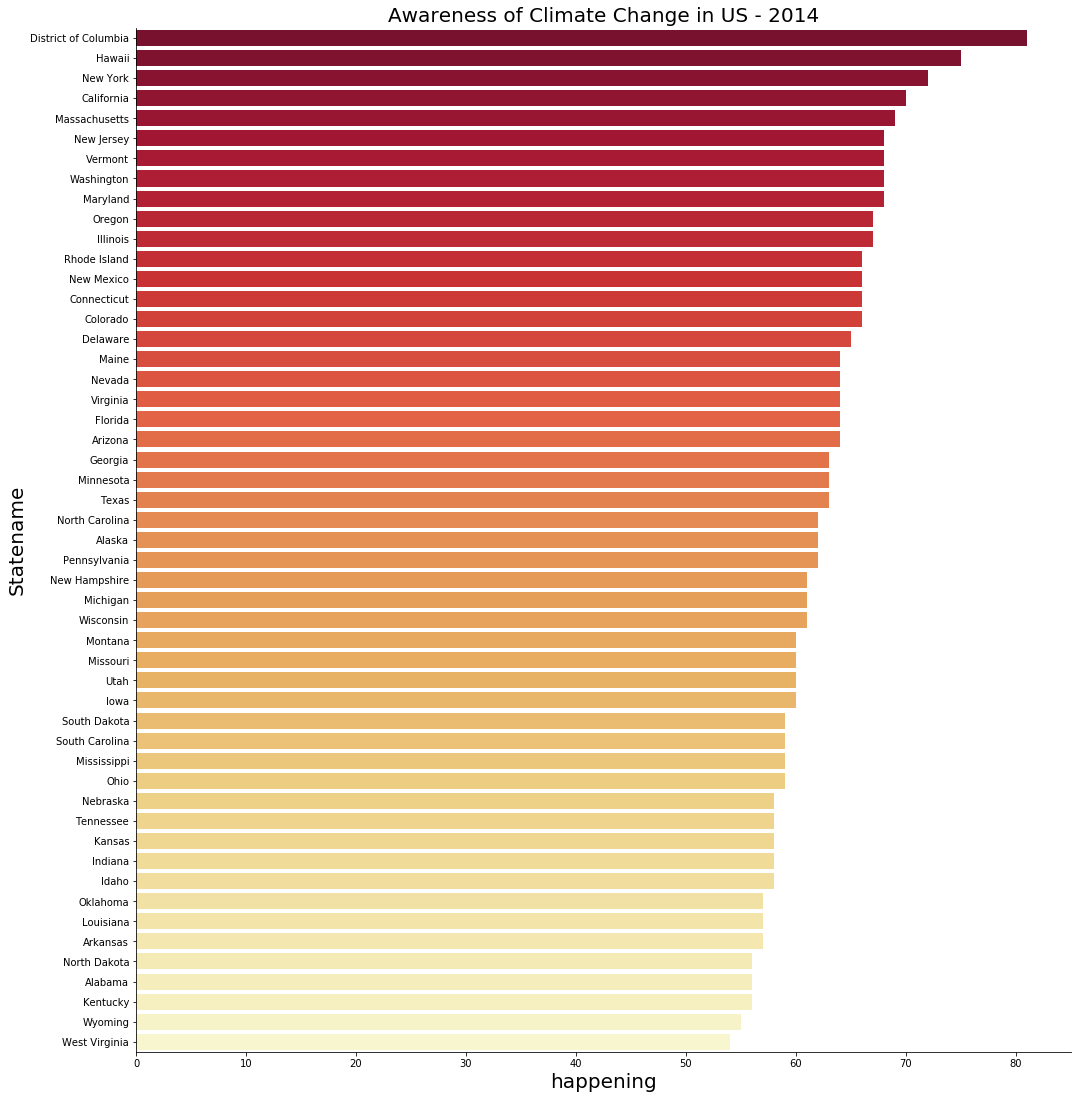

In [5]:
#plot awareness states
sc = sns.color_palette("YlOrRd", 51)
sc.reverse()
sns.catplot(x = 'happening', y = 'Statename', kind = 'bar', palette = sc, data = sort_state_2014, height = 15)
plt.xlabel('happening', size = 20)
plt.ylabel('Statename', size = 20)
plt.title('Awareness of Climate Change in US - 2014', size = 20)

In [6]:
#store top 10 awareness states
top10_aware_2014 = sort_state_2014.head(10)
print(top10_aware_2014)

               Statename  happening
7   District of Columbia         81
11                Hawaii         75
34              New York         72
4             California         70
19         Massachusetts         69
31            New Jersey         68
46               Vermont         68
47            Washington         68
20              Maryland         68
37                Oregon         67


In [7]:
#store last 10 awareness states
last10_aware_2014 = sort_state_2014.tail(10)
print(last10_aware_2014)

        Statename  happening
15        Indiana         58
13          Idaho         58
36       Oklahoma         57
18      Louisiana         57
2        Arkansas         57
28   North Dakota         56
1         Alabama         56
17       Kentucky         56
50        Wyoming         55
49  West Virginia         54


# Data Cleaning - Awareness by States - 2016

In [8]:
#import awareness by state 2016
awareness_2016 = pd.read_csv('Datasets/YCOM_2016.csv')
#print(awareness_2016.columns)
print(awareness_2016)

       GeoType  GEOID                            GeoName   TotalPop  discuss  \
0     National   9999                                 US  209056129   33.495   
1        State      1                            Alabama    3217902   27.468   
2        State      2                             Alaska     460319   36.632   
3        State      4                            Arizona    4284776   36.724   
4        State      5                           Arkansas    1949963   28.832   
5        State      6                         California   24865866   39.309   
6        State      8                           Colorado    3453403   39.213   
7        State      9                        Connecticut    2455577   35.887   
8        State     10                           Delaware     620886   32.584   
9        State     11               District of Columbia     442721   43.448   
10       State     12                            Florida   13561596   31.819   
11       State     13                   

In [9]:
#extract rows that are 'states' type
state_2016 = awareness_2016[awareness_2016['GeoType'].str.match('State')]

In [10]:
#store GeoName and happening data only
state_2016 = state_2016[['GeoName', 'happening']]
print(state_2016)

                 GeoName  happening
1                Alabama     63.450
2                 Alaska     69.588
3                Arizona     68.827
4               Arkansas     64.120
5             California     75.241
6               Colorado     71.004
7            Connecticut     71.904
8               Delaware     70.691
9   District of Columbia     84.364
10               Florida     70.047
11               Georgia     67.744
12                Hawaii     78.490
13                 Idaho     64.889
14              Illinois     72.649
15               Indiana     64.138
16                  Iowa     66.872
17                Kansas     65.328
18              Kentucky     62.392
19             Louisiana     65.452
20                 Maine     69.178
21              Maryland     75.139
22         Massachusetts     73.947
23              Michigan     68.353
24             Minnesota     68.931
25           Mississippi     65.657
26              Missouri     66.107
27               Montana    

We need both the same top10 and last10 awareness states in 2014 from the dataset 2016 in order to compare

In [11]:
#extract top10 awareness states in 2014 from the dataset 2016
sametopstate_2016 = pd.DataFrame([])
for index, rows in state_2016.iterrows():
    name = rows['GeoName']
    happen = rows['happening']
    for n in top10_aware_2014['Statename']:
        if name == n:
            sametopstate_2016 = sametopstate_2016.append({'Statename' : name, 'happening' : happen}, ignore_index = True)
            
print(sametopstate_2016)

              Statename  happening
0            California     75.241
1  District of Columbia     84.364
2                Hawaii     78.490
3              Maryland     75.139
4         Massachusetts     73.947
5            New Jersey     75.110
6              New York     77.018
7                Oregon     72.137
8               Vermont     72.692
9            Washington     72.632


In [12]:
#extract last10 awareness states in 2014 from the dataset 2016
samelaststate_2016 = pd.DataFrame([])
for index, rows in state_2016.iterrows():
    name = rows['GeoName']
    happen = rows['happening']
    for n in last10_aware_2014['Statename']:
        if name == n:
            samelaststate_2016 = samelaststate_2016.append({'Statename' : name, 'happening' : happen}, ignore_index = True)
            
print(samelaststate_2016)

       Statename  happening
0        Alabama     63.450
1       Arkansas     64.120
2          Idaho     64.889
3        Indiana     64.138
4       Kentucky     62.392
5      Louisiana     65.452
6   North Dakota     62.190
7       Oklahoma     63.127
8  West Virginia     60.476
9        Wyoming     60.921


# Data Cleaning - Carbon dioxide emission by state – US only (2005-2016)

In [13]:
#import data
carbon_dioxide_emission = pd.read_excel('Datasets/Carbon_dioxide_emission_by_state.xlsx')

In [14]:
#Rename columns and clean the dataset
carbon_dioxide_emission.rename(columns = {'Table 2. State energy-related carbon dioxide emissions by year, adjusted (2005─2016)' : 'State'},
                              inplace = True) 
cde = carbon_dioxide_emission.ix[4:45]
cde = cde.drop(['Unnamed: 13', 'Unnamed: 14'], axis = 1)
cde.rename(columns = {'Unnamed: 1' : '2005',
                   'Unnamed: 2' : '2006',
                   'Unnamed: 3' : '2007',
                   'Unnamed: 4' : '2008',
                   'Unnamed: 5' : '2009',
                   'Unnamed: 6' : '2010',
                   'Unnamed: 7' : '2011',
                   'Unnamed: 8' : '2012',
                   'Unnamed: 9' : '2013',
                   'Unnamed: 10' : '2014',
                   'Unnamed: 11' : '2015',
                   'Unnamed: 12' : '2016'}, inplace = True)
print(cde)



                   State        2005        2006        2007        2008  \
4                Alabama  145.717386  148.040103  149.574946  141.803359   
5                 Alaska   49.017593   46.644660   44.870695   40.253261   
6                Arizona   98.289736  101.468835  103.357057  103.841365   
7               Arkansas   61.080761   62.918003   64.213320   65.141909   
8             California  390.133567  398.302410  403.127766  387.428138   
9               Colorado   96.795597   97.700271  100.254100   98.388137   
10           Connecticut   44.806009   41.662092   40.835317   38.253591   
11              Delaware   17.056965   15.971158   16.783208   15.862116   
12  District of Columbia    3.984124    3.229448    3.425608    3.130070   
13               Florida  264.996379  263.157296  260.578250  242.271887   
14               Georgia  187.410094  184.642255  187.141716  174.538665   
15                Hawaii   23.302532   23.545096   24.344604   19.561525   
16          

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [15]:
#extract the top10 awareness state's correlated emission amount in 2014
emissiontopstate_2014 = pd.DataFrame([])
for index, rows in cde.iterrows():
    name = rows['State']
    emission = rows['2014']
    for n in top10_aware_2014['Statename']:
        if name == n:
            emissiontopstate_2014 = emissiontopstate_2014.append({'Statename' : name, 'CO2_2014' : emission}, ignore_index = True)
            
emissiontopstate_2014 = emissiontopstate_2014[['Statename', 'CO2_2014']]
print(emissiontopstate_2014)

              Statename    CO2_2014
0            California  357.499077
1  District of Columbia    3.058483
2                Hawaii   18.598966
3              Maryland   62.184186
4         Massachusetts   64.589904
5            New Jersey  114.727829
6              New York  171.968046
7                Oregon   38.527135


In [16]:
#extract the last10 awareness state's correlated emission amount in 2014
emissionlaststate_2014 = pd.DataFrame([])
for index, rows in cde.iterrows():
    name = rows['State']
    emission = rows['2014']
    for n in last10_aware_2014['Statename']:
        if name == n:
            emissionlaststate_2014 = emissionlaststate_2014.append({'Statename' : name, 'CO2_2014' : emission}, ignore_index = True)
            
emissionlaststate_2014 = emissionlaststate_2014[['Statename', 'CO2_2014']]
print(emissionlaststate_2014)

      Statename    CO2_2014
0       Alabama  124.751678
1      Arkansas   69.892555
2         Idaho   16.900937
3       Indiana  207.945714
4      Kentucky  139.326399
5     Louisiana  203.776138
6  North Dakota   59.358200
7      Oklahoma  105.865059


In [17]:
#extract the top10 awareness state's correlated emission amount in 2016
emissiontopstate_2016 = pd.DataFrame([])
for index, rows in cde.iterrows():
    name = rows['State']
    emission = rows['2016']
    for n in top10_aware_2014['Statename']:
        if name == n:
            emissiontopstate_2016 = emissiontopstate_2016.append({'Statename' : name, 'CO2_2016' : emission}, ignore_index = True)
            
emissiontopstate_2016 = emissiontopstate_2016[['Statename', 'CO2_2016']]
print(emissiontopstate_2016)

              Statename    CO2_2016
0            California  363.342966
1  District of Columbia    2.779124
2                Hawaii   18.545987
3              Maryland   57.874769
4         Massachusetts   64.543938
5            New Jersey  111.444349
6              New York  164.556233
7                Oregon   38.177567


In [18]:
#extract the last10 awareness state's correlated emission amount in 2016
emissionlaststate_2016 = pd.DataFrame([])
for index, rows in cde.iterrows():
    name = rows['State']
    emission = rows['2016']
    for n in last10_aware_2014['Statename']:
        if name == n:
            emissionlaststate_2016 = emissionlaststate_2016.append({'Statename' : name, 'CO2_2016' : emission}, ignore_index = True)
            
emissionlaststate_2016 = emissionlaststate_2016[['Statename', 'CO2_2016']]
print(emissionlaststate_2016)

      Statename    CO2_2016
0       Alabama  115.721763
1      Arkansas   62.754316
2         Idaho   18.483087
3       Indiana  182.854052
4      Kentucky  124.602368
5     Louisiana  210.280227
6  North Dakota   54.581890
7      Oklahoma   97.444457


# Merge top10 awareness and emission data by statename

In [19]:
topstate = pd.merge(top10_aware_2014, sametopstate_2016, on = 'Statename')
topstate = pd.merge(topstate, emissiontopstate_2014, on = 'Statename')
topstate = pd.merge(topstate, emissiontopstate_2016, on = 'Statename')
topstate = topstate.rename(index = str, columns = {"happening_x": "happening2014", "happening_y": "happening2016"})
print(topstate)

              Statename  happening2014  happening2016    CO2_2014    CO2_2016
0  District of Columbia             81         84.364    3.058483    2.779124
1                Hawaii             75         78.490   18.598966   18.545987
2              New York             72         77.018  171.968046  164.556233
3            California             70         75.241  357.499077  363.342966
4         Massachusetts             69         73.947   64.589904   64.543938
5            New Jersey             68         75.110  114.727829  111.444349
6              Maryland             68         75.139   62.184186   57.874769
7                Oregon             67         72.137   38.527135   38.177567


# Merge last10 awareness and emission data by statename

In [20]:
#merge all laststate data: awareness from 2014 and 2016, emission from 2014 and 2016
laststate = pd.merge(last10_aware_2014, samelaststate_2016, on = 'Statename')
laststate = pd.merge(laststate, emissionlaststate_2014, on = 'Statename')
laststate = pd.merge(laststate, emissionlaststate_2016, on = 'Statename')
laststate = laststate.rename(index = str, columns = {"happening_x": "happening2014", "happening_y": "happening2016"})

#sort data by awareness in 2014 in ascending order
laststate = laststate.sort_values(by = ['happening2014'], ascending = True)
print(laststate)

      Statename  happening2014  happening2016    CO2_2014    CO2_2016
5  North Dakota             56         62.190   59.358200   54.581890
6       Alabama             56         63.450  124.751678  115.721763
7      Kentucky             56         62.392  139.326399  124.602368
2      Oklahoma             57         63.127  105.865059   97.444457
3     Louisiana             57         65.452  203.776138  210.280227
4      Arkansas             57         64.120   69.892555   62.754316
0       Indiana             58         64.138  207.945714  182.854052
1         Idaho             58         64.889   16.900937   18.483087


# Relationship between awareness and emission

Text(0, 0.5, 'CO2')

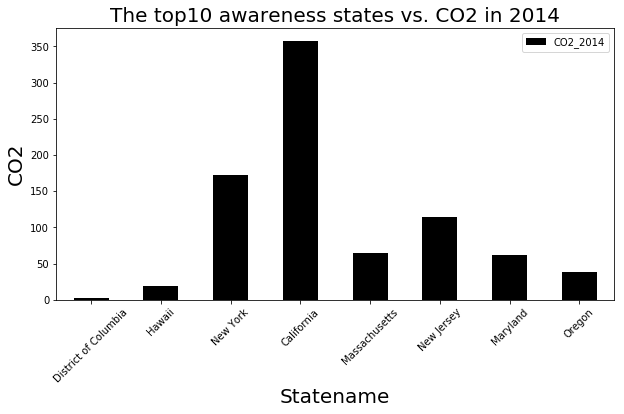

In [21]:
plt.rcParams["figure.figsize"] = (10,5)
topstate.plot(x = 'Statename', y = 'CO2_2014', kind = 'bar', color = 'black')
plt.title('The top10 awareness states vs. CO2 in 2014', size = 20)
plt.xlabel('Statename', size = 20)
plt.xticks(rotation = 45)
plt.ylabel('CO2', size = 20)

Based on the plot above, it plots the state based on the top awareness in 2014 (the most left state is the highest awareness state). We have assumed that the higher awareness state will have lower emission amount. However, according to the histogram above, our assumption is not true. For example, we can observe that California's awareness is higher than Massachusetts, but the fact is that California's emission amount in 2014 is higher than Alabama.

Text(0, 0.5, 'CO2')

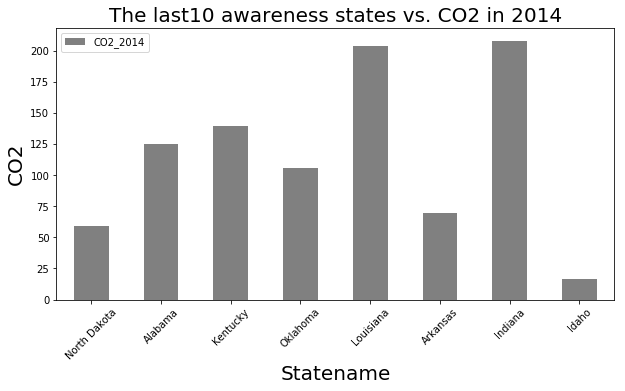

In [22]:
plt.rcParams["figure.figsize"] = (10,5)
laststate.plot(x = 'Statename', y = 'CO2_2014', kind = 'bar', color = 'gray')
plt.title('The last10 awareness states vs. CO2 in 2014', size = 20)
plt.xlabel('Statename', size = 20)
plt.xticks(rotation = 45)
plt.ylabel('CO2', size = 20)

Based on the plot above, it plots the state based on the lower awareness in 2014 (the most left state is the lowest awareness state). We have assumed that the lower awareness state will have higher emission amount. However, according to the histogram above, our assumption is not true. For example, we can observe that North Dakota's awareness is lower than Alabama, but the fact is that North Dakota's emission amount in 2014 is lower than Alabama.

# Will the awareness change over year affect the emission level?

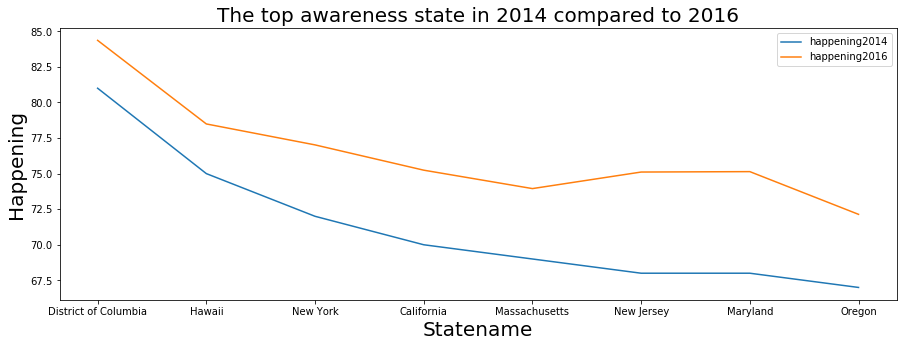

In [23]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot('Statename', 'happening2014', data = topstate, label = 'happening2014')
plt.plot('Statename', 'happening2016', data = topstate, label = 'happening2016')
plt.title('The top awareness state in 2014 compared to 2016', size = 20)
plt.xlabel('Statename', size = 20)
plt.ylabel('Happening', size = 20)
plt.legend()

The plot shows that the awareness of global warming in the top 10 states have changed in 2016. Overall, each of these states's awareness is increased.

Text(0, 0.5, 'CO2')

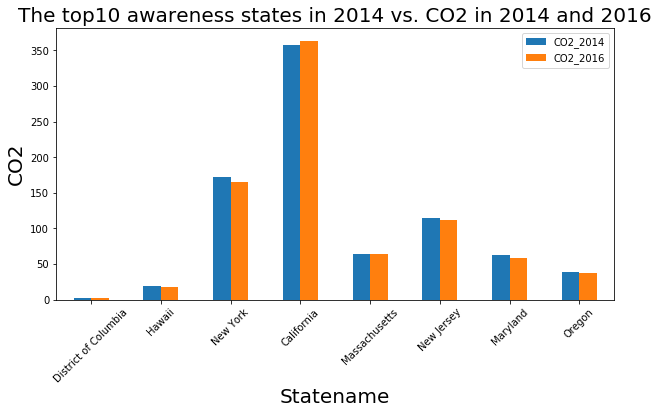

In [24]:
plt.rcParams["figure.figsize"] = (10,5)
topstate.plot(x = 'Statename', y = ['CO2_2014', 'CO2_2016'], kind = 'bar')
plt.title('The top10 awareness states in 2014 vs. CO2 in 2014 and 2016', size = 20)
plt.xlabel('Statename', size = 20)
plt.xticks(rotation = 45)
plt.ylabel('CO2', size = 20)

By looking at this diagram, some of the states's CO2 emission is increased and some of the states's CO2 emission is decreased. Even though the fact that we obverse from the preivous histogram that the awareness level of all top10 awareness states in 2014 are increased, not all of their CO2 emission are decreased.

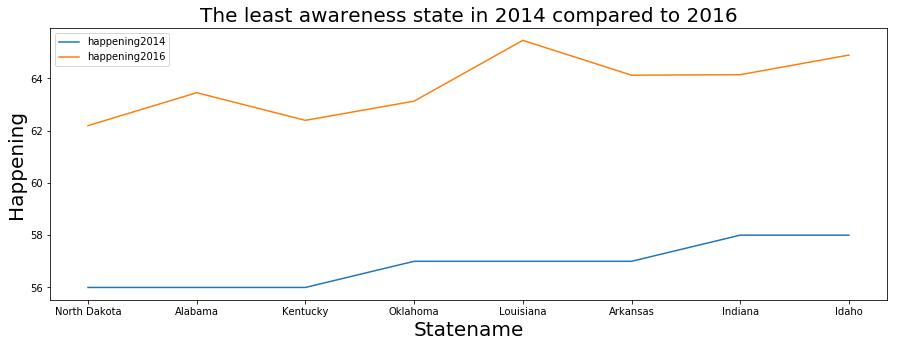

In [25]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot('Statename', 'happening2014', data = laststate, label = 'happening2014')
plt.plot('Statename', 'happening2016', data = laststate, label = 'happening2016')
plt.title('The least awareness state in 2014 compared to 2016', size = 20)
plt.xlabel('Statename', size = 20)
plt.ylabel('Happening', size = 20)
plt.legend()

The plot shows that the awareness of global warming in the last 10 states have changed in 2016. Overall, each of these states's awareness is increased. Compared to the top awareness state plot above, the least awareness states have significant increased their awareness of global warming over two years.

Text(0, 0.5, 'CO2')

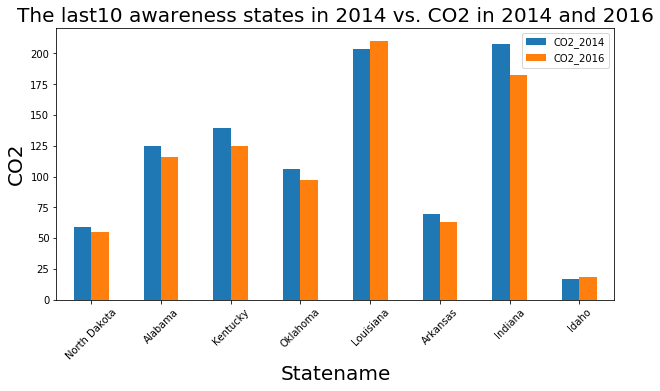

In [26]:
plt.rcParams["figure.figsize"] = (10,5)
laststate.plot(x = 'Statename', y = ['CO2_2014', 'CO2_2016'], kind = 'bar')
plt.title('The last10 awareness states in 2014 vs. CO2 in 2014 and 2016', size = 20)
plt.xlabel('Statename', size = 20)
plt.xticks(rotation = 45)
plt.ylabel('CO2', size = 20)

By looking at this diagram, some of the states's CO2 emission is increased and some of the states's CO2 emission is decreased. Same result as what we found from the top10 states in the previous diagram. Even though the fact that we obverse from the preivous histogram that the awareness level of all last10 awareness states in 2014 are increased, not all of their CO2 emission are decreased. 

However, the interesting thing is that we can recognize that the CO2 emission amount has significant decreased within the last10 states compared to top10 states - which only decreased by a little amount.

# Data Cleaning - Annual greenhouse gas data – US only (1990-2017)

In [27]:
#import greenhouse gas data
annual_gas_us = pd.read_csv('Datasets/GreenhouseGasInventoryDataUS.csv')
print(annual_gas_us)

                 Gas         1990         1991         1992         1993  \
0     Carbon dioxide  5121.179440  5071.563914  5174.670601  5281.386608   
1            Methane   779.845550   784.384856   783.176602   770.308404   
2      Nitrous oxide   370.307694   368.961757   371.786442   385.347234   
3  Fluorinated gases    99.667859    90.704668    95.300712    95.027350   
4              Total  6371.000543  6315.615194  6424.934357  6532.069596   

          1994         1995         1996         1997         1998  \
0  5375.033803  5436.697986  5625.041885  5701.920919  5749.893056   
1   775.160651   767.845344   759.491158   744.932926   729.618317   
2   376.511527   388.502830   395.545749   386.608376   402.495771   
3    98.129806   117.021137   127.620262   134.999750   150.518866   
4  6624.835787  6710.067297  6907.699054  6968.461971  7032.526010   

      ...              2008         2009         2010         2011  \
0     ...       5928.256329  5493.547908  5700.10833

In [28]:
#Transpose dataset and reset/rename index
annual_gas_us = annual_gas_us.set_index('Gas').rename_axis(['Year']).transpose().reset_index()
annual_gas_us.rename(columns = {'index' : 'Year'}, inplace = True)
print(annual_gas_us)

Year  Year  Carbon dioxide     Methane  Nitrous oxide  Fluorinated gases  \
0     1990     5121.179440  779.845550     370.307694          99.667859   
1     1991     5071.563914  784.384856     368.961757          90.704668   
2     1992     5174.670601  783.176602     371.786442          95.300712   
3     1993     5281.386608  770.308404     385.347234          95.027350   
4     1994     5375.033803  775.160651     376.511527          98.129806   
5     1995     5436.697986  767.845344     388.502830         117.021137   
6     1996     5625.041885  759.491158     395.545749         127.620262   
7     1997     5701.920919  744.932926     386.608376         134.999750   
8     1998     5749.893056  729.618317     402.495771         150.518866   
9     1999     5829.519951  717.451035     377.091249         147.399221   
10    2000     5997.298912  709.304023     376.997254         148.410584   
11    2001     5899.855485  703.915004     378.065357         134.974237   
12    2002  

# Data Analysis 

Text(0.5, 1.0, 'Annual Greenhouse Gas in US - 1990 to 2017')

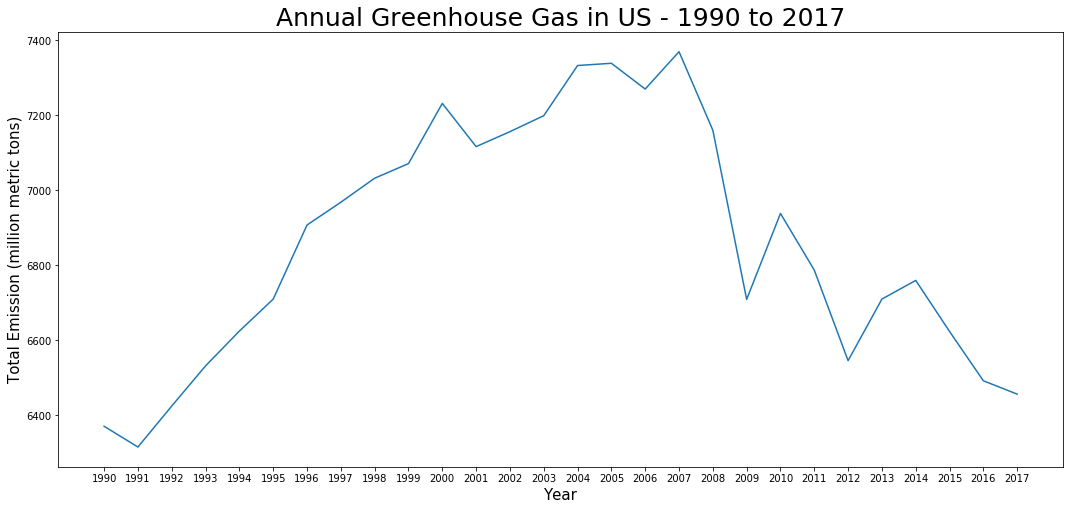

In [29]:
#Plot the diagram to show annual greenhouse gas in US over the year
f = plt.figure(figsize = (18,8))
ax = f.add_subplot(1,1,1)
ax.plot(annual_gas_us['Year'], annual_gas_us['Total'])
ax.set_xlabel('Year', size = 15)
ax.set_ylabel('Total Emission (million metric tons)', size = 15)
ax.set_title('Annual Greenhouse Gas in US - 1990 to 2017', size = 25)

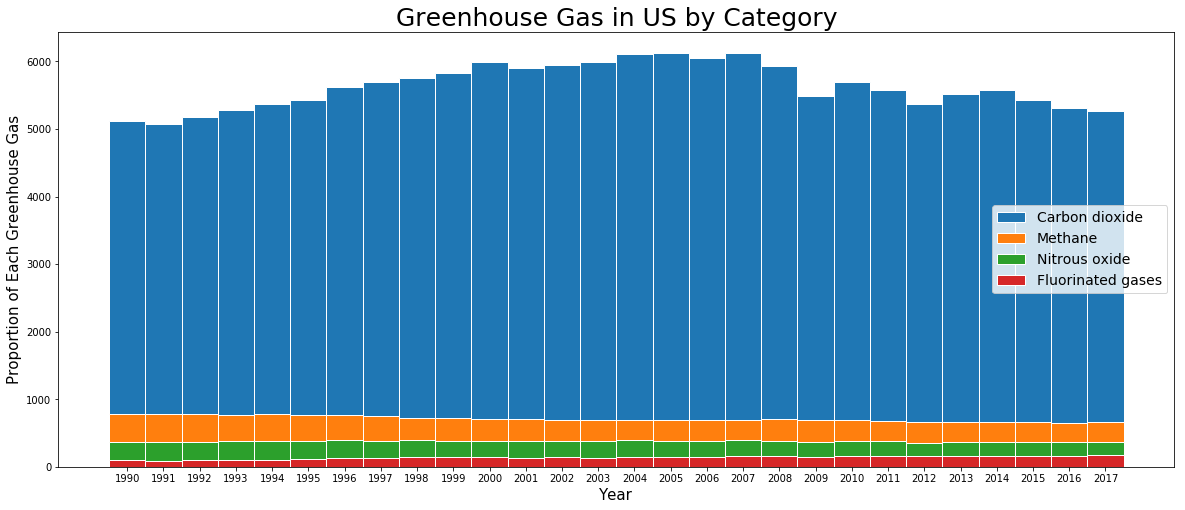

In [30]:
#Generate barplot to show emission in US over year by category
f = plt.figure(figsize = (20,8))
ax = f.add_subplot(1,1,1)
bars = max(annual_gas_us['Total'])
r = annual_gas_us['Year']
barWidth = 1

plt.bar(r, annual_gas_us['Carbon dioxide'], edgecolor = 'white', width = barWidth, label = 'Carbon dioxide')
plt.bar(r, annual_gas_us['Methane'], edgecolor = 'white', width = barWidth, label = 'Methane')
plt.bar(r, annual_gas_us['Nitrous oxide'], edgecolor = 'white', width = barWidth, label = 'Nitrous oxide')
plt.bar(r, annual_gas_us['Fluorinated gases'], edgecolor = 'white', width = barWidth, label = 'Fluorinated gases')

plt.xlabel('Year', size = 15)
plt.ylabel('Proportion of Each Greenhouse Gas', size = 15)
plt.title('Greenhouse Gas in US by Category', size = 25)
plt.legend(loc = 5, prop = {'size': 14})
